In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")
data.head()

data=data.interpolate(method='polynomial', order=5)
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [3]:
data.dtypes


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
data['ocean_proximity'] = data.ocean_proximity.replace('NEAR BAY',0).replace('<1H OCEAN',1).replace('INLAND',1).replace('NEAR OCEAN',0).replace('ISLAND',0).astype(np.int)
data.dtypes



longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [5]:
feature_cols = [x for x in data.columns if x not in 'ocean_proximity'] 

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
start_shuff_split=StratifiedShuffleSplit(n_splits=1,test_size=1000,random_state=42)
train_idx,test_idx=next(start_shuff_split.split(data[feature_cols],data["ocean_proximity"]))
X_train=data.loc[train_idx,feature_cols]
y_train=data.loc[train_idx,'ocean_proximity']
X_test=data.loc[test_idx,feature_cols]
y_test=data.loc[test_idx,'ocean_proximity']


In [7]:
y_train.value_counts(normalize=True).sort_index()

0    0.239969
1    0.760031
Name: ocean_proximity, dtype: float64

In [8]:
y_test.value_counts(normalize=True).sort_index()

0    0.24
1    0.76
Name: ocean_proximity, dtype: float64

In [9]:
from sklearn.tree import DecisionTreeClassifier 
dt =DecisionTreeClassifier(random_state=42)
dt=dt.fit(X_train,y_train)


In [10]:
dt.tree_.node_count,dt.tree_.max_depth

(467, 14)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [12]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,0.987000
precision,1.0,0.990802
recall,1.0,0.992105
f1,1.0,0.991453


In [16]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

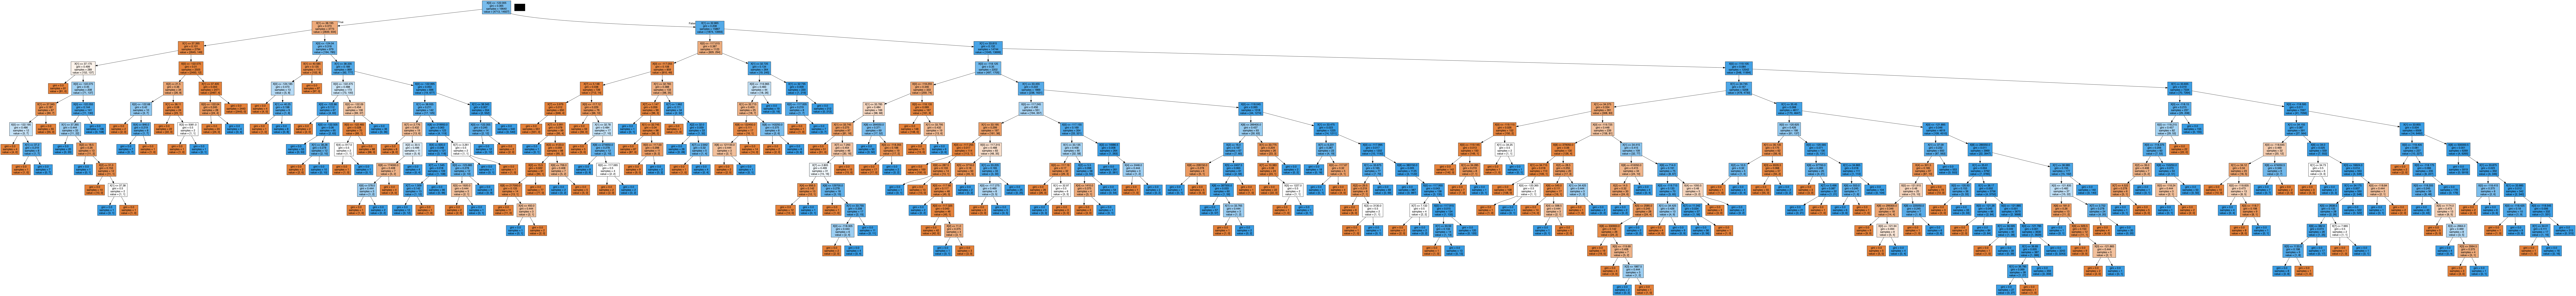

In [17]:
### BEGIN SOLUTION
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename)